In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import plotly.express as px
!pip install ydata-profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
Diabetes = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
Diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   
768            0      123             77              0        1  36.3   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  
768                     0.252   55        1  

[769 rows x 9 columns]

In [3]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [4]:
Diabetes.describe().T

count        mean         std     min     25%  \
Pregnancies               769.0    3.840052    3.370237   0.000   1.000   
Glucose                   769.0  120.897269   31.951886   0.000  99.000   
BloodPressure             769.0   69.115735   19.345296   0.000  62.000   
SkinThickness             769.0   20.509753   15.959020   0.000   0.000   
Insulin                   769.0   79.697009  115.203999   0.000   0.000   
BMI                       769.0   31.998179    7.880557   0.000  27.300   
DiabetesPedigreeFunction  769.0    0.471590    0.331208   0.078   0.244   
Age                       769.0   33.269181   11.778737  21.000  24.000   
Outcome                   769.0    0.349805    0.477219   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  140.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000   99.00  
Insulin                    29.000  127.000  846.00  
BMI                        32.000   36.600   67.10  
DiabetesPedigreeFunction    0.371    0.626    2.42  
Age                        29.000   41.000   81.00  
Outcome                     0.000    1.000    1.00

In [5]:
Diabetes.dropna()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   
768            0      123             77              0        1  36.3   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  
768                     0.252   55        1  

[769 rows x 9 columns]

In [6]:
df = Diabetes

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Which feature has the highest correlation with diabetes?

In [8]:
print(df.corr()['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466132
BMI                         0.293253
Age                         0.240816
Pregnancies                 0.219418
DiabetesPedigreeFunction    0.172406
Insulin                     0.129137
SkinThickness               0.072298
BloodPressure               0.065706
Name: Outcome, dtype: float64


## What percentage of patients have diabetes in this dataset?

In [9]:
Outcome =df['Outcome'].value_counts()*100/len(df)
Outcome

Outcome
0    65.019506
1    34.980494
Name: count, dtype: float64

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    269
Name: count, dtype: int64

## How many rows have insulin = 0? Is that realistic?

In [11]:
(df['Insulin'] == 0).sum()

374

In [12]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)

In [13]:
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN in those columns
df_cleaned = df.copy()
df_cleaned[columns_with_invalid_zeros] = df_cleaned[columns_with_invalid_zeros].replace(0, np.nan)

In [14]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_cleaned, title="Cleaned Diabetes Dataset Report", explorative=True)
profile.to_notebook_iframe()  # or profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 135.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
import plotly.express as px

# Clean up zero values (optional)
df_plot = df.copy()
df_plot[['Glucose', 'BMI']] = df_plot[['Glucose', 'BMI']].replace(0, np.nan)

# Remove rows with missing Glucose or BMI just for this plot
df_plot = df_plot.dropna(subset=['Glucose', 'BMI'])

# Map Outcome for clarity
df_plot['Outcome_labeled'] = df_plot['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Plotly scatter
fig = px.scatter(
    df_plot,
    x='Glucose',
    y='BMI',
    color='Outcome_labeled',
    title='BMI vs Glucose: Diabetic vs Non-Diabetic Individuals',
    labels={'Outcome_labeled': 'Diabetes Status'},
    color_discrete_map={'Non-Diabetic': '#4CAF50', 'Diabetic': '#F44336'},
    opacity=0.7,
    height=600
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(template='plotly_white')
fig.show()


## What is the distribution of BMI? Are there outliers?

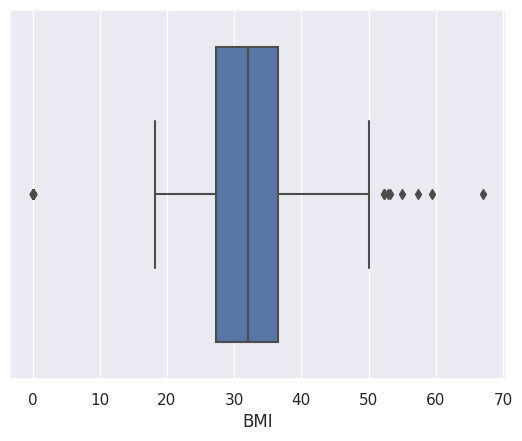

In [16]:
sns.boxplot(x=df['BMI'])
plt.show()

## Proportion of Diabetic vs Non-Diabetic Individuals

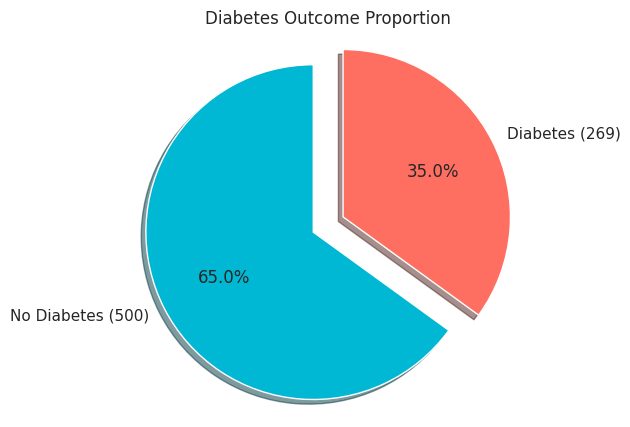

In [17]:
# Count outcomes
outcome_counts = df['Outcome'].value_counts()

# Total for sanity (optional)
total = outcome_counts.sum()

# Labels WITH counts
labels = [f'No Diabetes ({outcome_counts[0]})', f'Diabetes ({outcome_counts[1]})']

# Colors must match label order (0 = No Diabetes, 1 = Diabetes)
colors = ['#00B8D4', '#FF6F61']
explode = [0.1, 0.1]

# Plot
plt.figure(figsize=(7, 5))
plt.pie(outcome_counts, explode=explode, labels=labels, autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=90)
plt.title('Diabetes Outcome Proportion')
plt.axis('equal')
plt.show()

## What is the average glucose level for diabetic vs non-diabetic patients?

In [18]:
glucose_by_outcome = df.groupby('Outcome')['Glucose'].mean().reset_index()
glucose_by_outcome

Outcome     Glucose
0        0  109.980000
1        1  141.189591

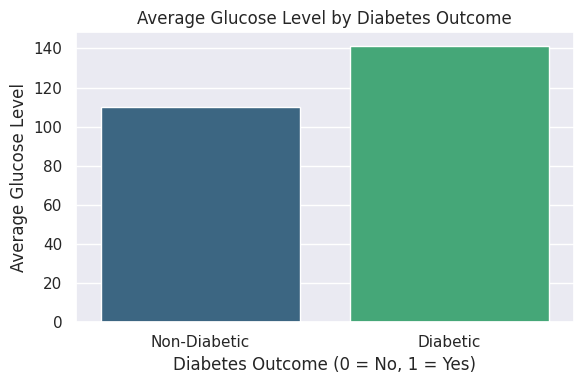

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(data=glucose_by_outcome, x='Outcome', y='Glucose', palette='viridis')

# Titles and labels
plt.title('Average Glucose Level by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])

# Show it
plt.tight_layout()
plt.show()

## Which Health Features Differ the Most Between Diabetic and Non-Diabetic Individuals?
### How Do Average Health Metrics Vary by Diabetes Status?

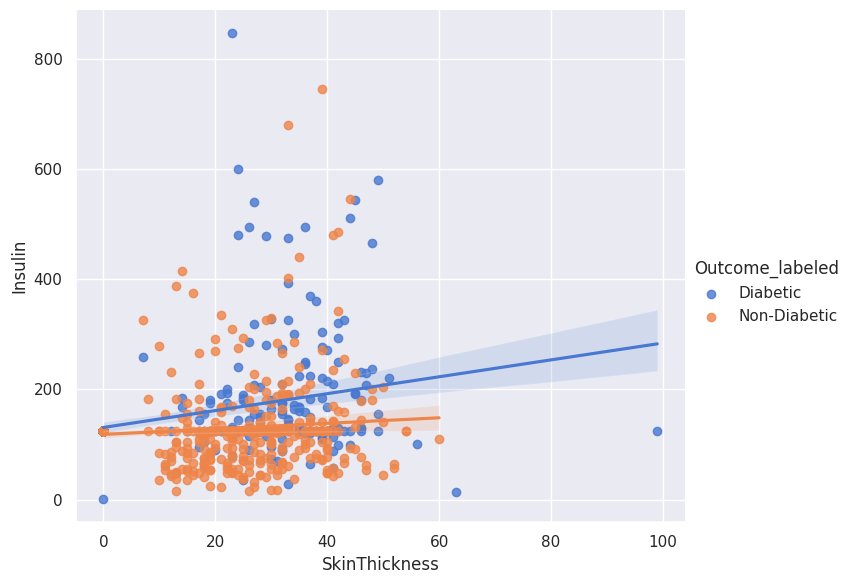

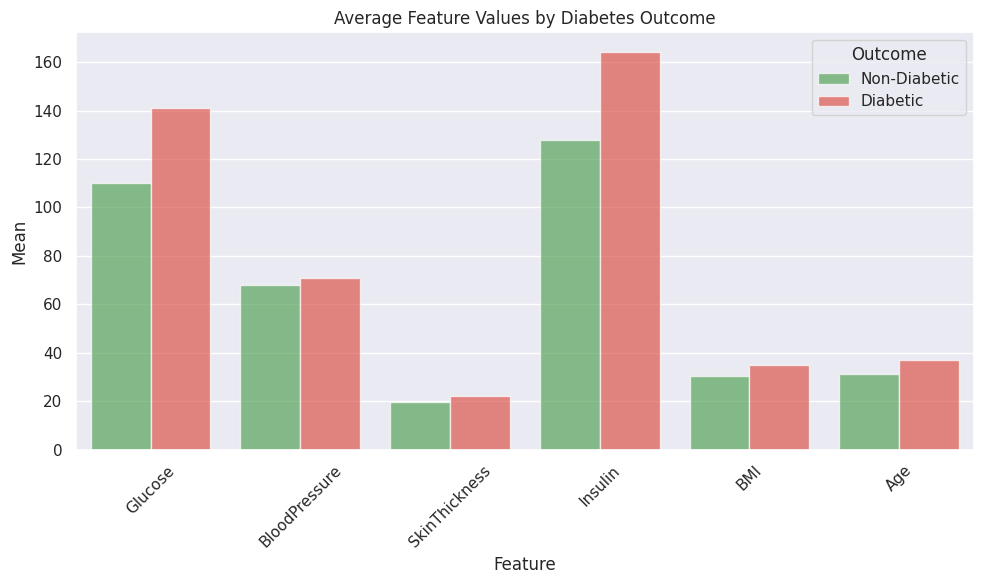

In [20]:
sns.lmplot(data=df_plot, x='SkinThickness', y='Insulin', hue='Outcome_labeled', palette='muted', height=6, aspect=1.2)

# Define the features to include
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Step 1: Group by Outcome and calculate mean
df_filtered = df.groupby('Outcome')[features].mean().reset_index()
df_filtered['Outcome'] = df_filtered['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Step 2: Melt the DataFrame
df_melted = df_filtered.melt(id_vars='Outcome', var_name='Feature', value_name='Mean')

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Feature', y='Mean', hue='Outcome', 
            palette={'Non-Diabetic': '#4CAF50', 'Diabetic': '#F44336'}, alpha=0.7)

plt.title('Average Feature Values by Diabetes Outcome')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


## What Do the Distributions of Key Health Metrics Tell Us About the Population?

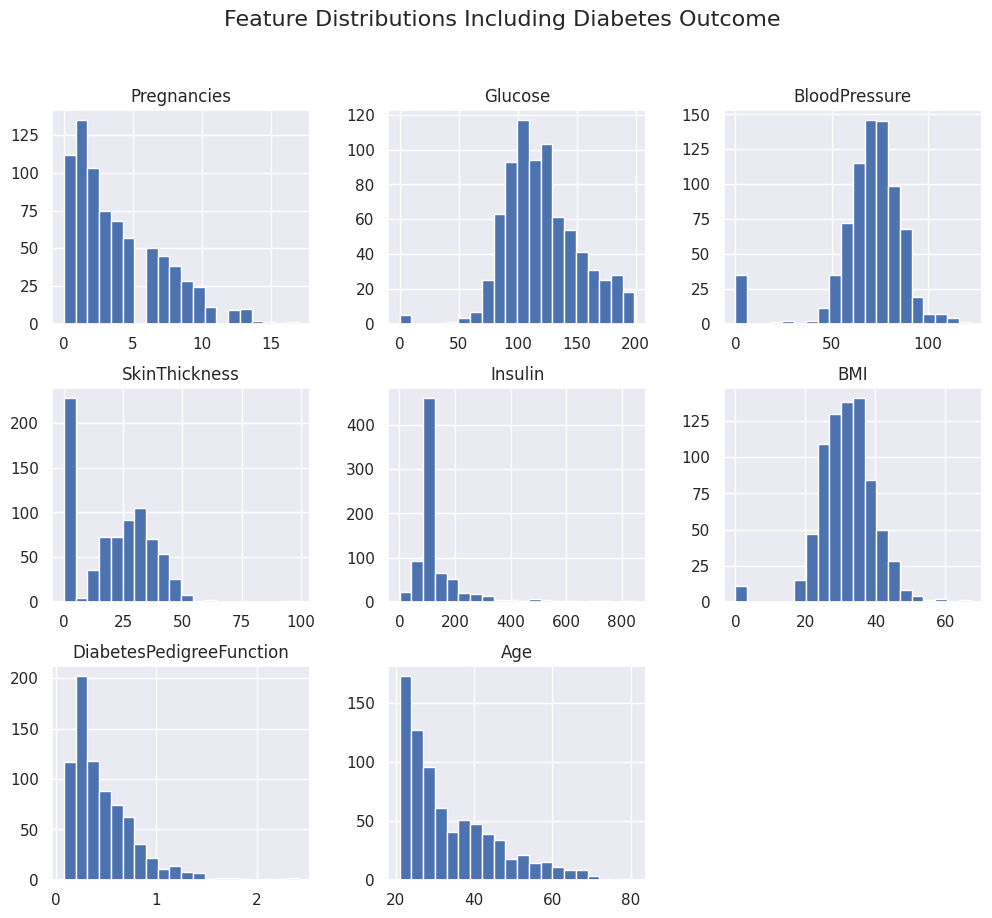

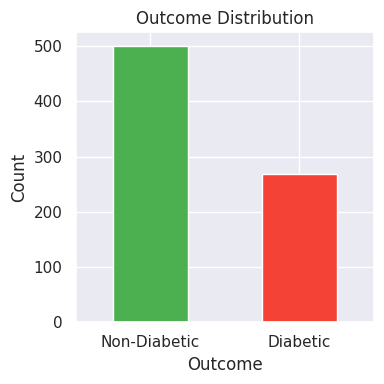

In [21]:
# 1. Copy + map Outcome
df_labeled = df.copy()
df_labeled['Outcome'] = df_labeled['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# 2. Create histogram grid
axes = df_labeled.drop(columns='Outcome').hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions Including Diabetes Outcome', fontsize=16)

# 3. Add separate bar plot for Outcome
plt.figure(figsize=(4, 4))
df_labeled['Outcome'].value_counts().plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Outcome Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Age Distribution by Diabetes Status

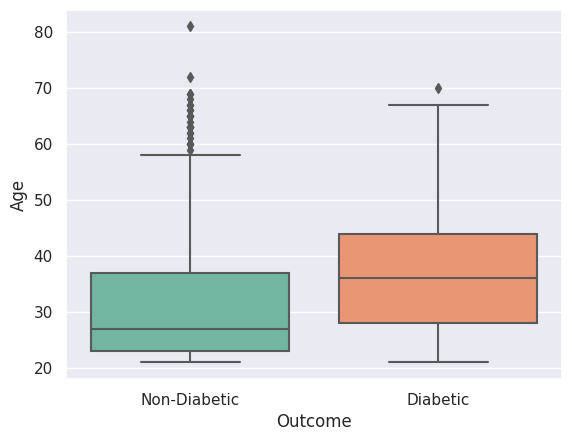

In [22]:
sns.boxplot(x='Outcome', y='Age', data=df, palette='Set2')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

## Distribution of Pregnancy Counts Among All Patients

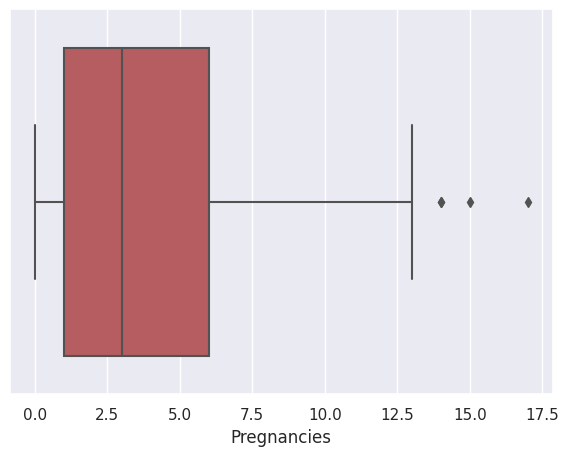

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Pregnancies'], color="r")
plt.show()

## Relationship Between Age and Glucose by Diabetes Outcome

In [24]:
df['Outcome_labeled'] = df['Outcome'].replace({1: 'Diabetic',0: 'Non-Diabetic'})

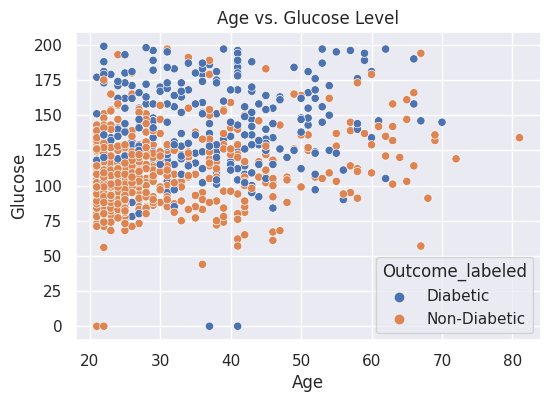

In [25]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Glucose', data=df, hue='Outcome_labeled')
plt.title('Age vs. Glucose Level')
plt.show()

## "How Do Age and BMI Relate to Diabetes Outcome?

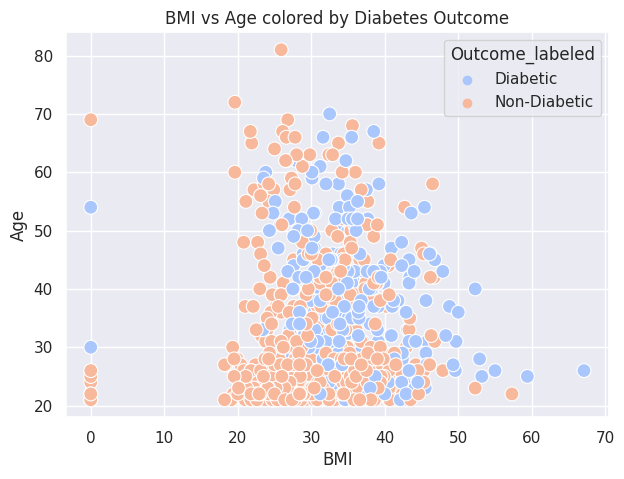

In [26]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='BMI', y='Age', hue='Outcome_labeled', data=df, palette='coolwarm', s=100)
plt.title('BMI vs Age colored by Diabetes Outcome')

plt.show()

## How Does Blood Pressure Vary Between Diabetic and Non-Diabetic Individuals?

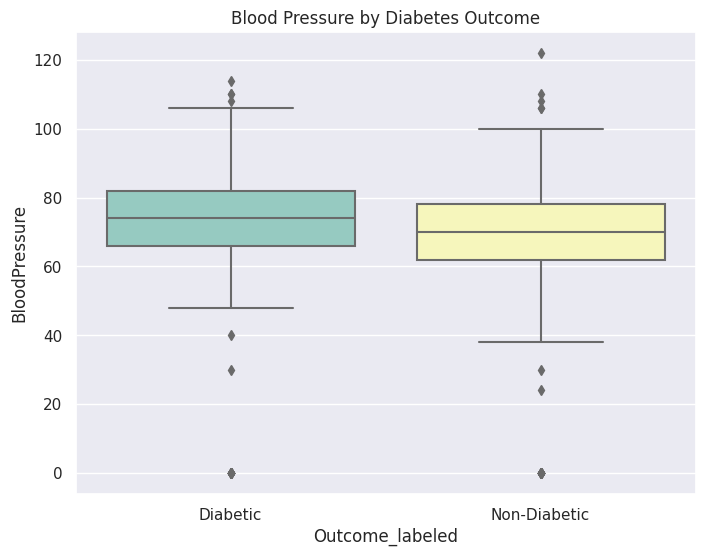

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome_labeled', y='BloodPressure', data=df, palette='Set3')
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()


## Relationship Between Skin Thickness and Insulin by Diabetes Status

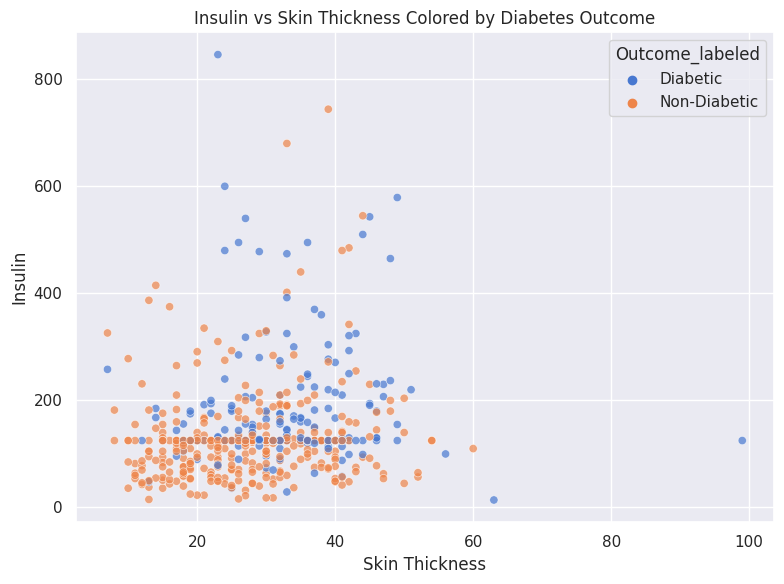

In [28]:

# Replace zeros with NaN where necessary
df_plot = df.copy()
df_plot[['SkinThickness', 'Insulin']] = df_plot[['SkinThickness', 'Insulin']].replace(0, np.nan)
df_plot = df_plot.dropna(subset=['SkinThickness', 'Insulin'])

# Map outcome if needed
df_plot['Outcome_labeled'] = df_plot['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='SkinThickness', y='Insulin', hue='Outcome_labeled', palette='muted', alpha=0.7)
plt.xlabel('Skin Thickness')
plt.ylabel('Insulin')
plt.title('Insulin vs Skin Thickness Colored by Diabetes Outcome')
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation Between Health Features in the Diabetes Dataset

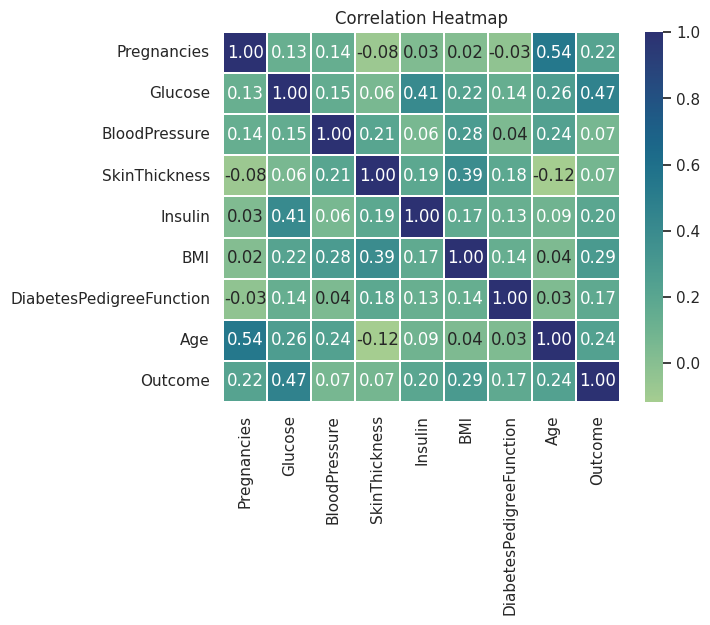

In [29]:
sns.heatmap(df.drop(columns=['Outcome_labeled']).corr(), cmap='crest', linewidths=0.1, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Is there a linear relationship between BMI and Insulin?

In [30]:
df[df['Insulin'] > 0][['BMI', 'Insulin']].corr()

BMI  Insulin
BMI      1.00000  0.16859
Insulin  0.16859  1.00000

## Relationship Between BMI and Insulin

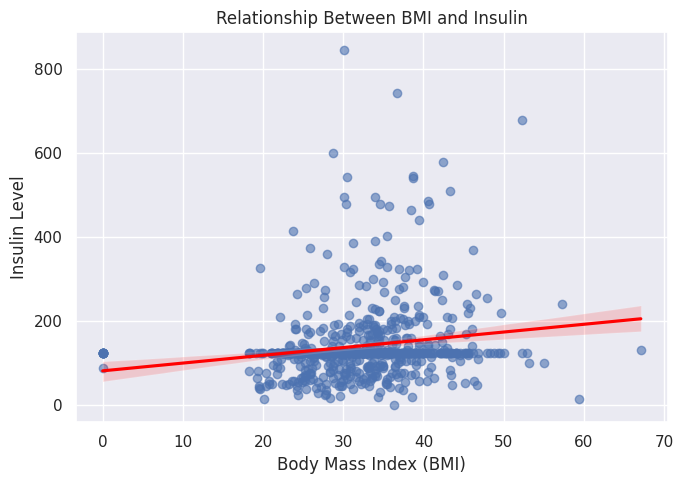

In [31]:
# Filter data
filtered_df = df[df['Insulin'] > 0]

# Create scatterplot with regression line
plt.figure(figsize=(7, 5))
sns.regplot(x='BMI', y='Insulin', data=filtered_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Relationship Between BMI and Insulin')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Insulin Level')
plt.tight_layout()
plt.show()